In [3]:
from google.colab import files
upload=files.upload()
import pandas as pd
upload_file=pd.read_csv("synthetic_logistic_regression.csv")
print(upload_file)

Saving synthetic_logistic_regression.csv to synthetic_logistic_regression.csv
     Feature1  Feature2  Feature3  Feature4  Feature5  Target
0   -1.830633 -0.095340 -0.654076  0.724051 -0.181319       0
1    0.260281  0.080151 -0.413465 -1.273314  1.482609       1
2   -1.379618  0.098744 -0.971657 -0.072798 -1.579555       1
3   -0.998061 -0.161506  1.051948  2.398537  2.120715       1
4   -0.369610  1.223565  0.621572  0.012779 -1.422353       1
..        ...       ...       ...       ...       ...     ...
495  0.250200 -0.918351 -0.383971  1.495096  2.326806       1
496 -0.902052 -1.014168  0.376410 -1.877473  0.544482       0
497 -0.333819  0.675970  0.696954  1.259195 -1.167655       1
498 -0.012089 -0.738645 -1.451176 -1.969202 -1.053567       0
499  0.937570  1.007042  0.659246  0.473678 -1.811102       1

[500 rows x 6 columns]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
df=pd.DataFrame(upload_file)
X=df.drop('Target',axis=1)
Y=df['Target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LogisticRegression()
training=model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
print(y_pred)


[0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0]


In [15]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,roc_auc_score
print("Accuracy score:",accuracy_score(Y_test,y_pred))
print("Precision:",precision_score(Y_test,y_pred))
print("f1 score:",f1_score(Y_test,y_pred))
print("recall score:",recall_score(Y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_pred,Y_test))
# AUC score
auc = roc_auc_score(Y_test, y_pred)
print("AUC:", auc)

#confusion matrix:[[TN FN] [FP TP]]

Accuracy score: 0.9
Precision: 0.9347826086956522
f1 score: 0.8958333333333334
recall score: 0.86
Confusion matrix: [[47  7]
 [ 3 43]]
AUC: 0.8999999999999999


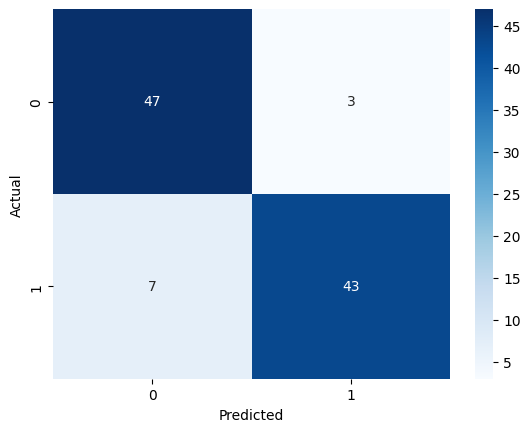

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
